In [2]:
# %%

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import string
import json
import numpy as np
import matplotlib.pyplot as plt
import re
# import nltk
# # nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib
from sklearn.decomposition import PCA


# pd.set_option('display.max_colwidth', -1)

# pd.set_option('display.max_columns', 10000, 'display.max_rows', 10000)
pd.set_option('display.float_format', lambda x: '%.6f' % x)


In [3]:

# under_sampling to balance data
def under_sampling(df, percent=1):
    majority = df[df['target'] == 0]
    minority = df[df['target'] == 1]
    lower_data = majority.sample(n=int(percent * len(minority)), replace=False, random_state=890, axis=0)
    return (pd.concat([lower_data, minority]))


# over sampling to balance data
def over_sampling(df, percent=1):
    # 通过numpy随机选取多数样本的采样下标
    '''
    percent:多数类别下采样的数量相对于少数类别样本数量的比例
    '''
    most_data = df[df['label'] == 1]  # 多数类别的样本
    minority_data = df[df['label'] == 0]  # 少数类别的样本
    index = np.random.randint(len(most_data), size=int(percent * len(minority_data)))
    # 下采样后数据样本
    lower_data = most_data.iloc[list(index)]  # 下采样


# replace unicode space character with space ' '
spaces = ['\u200b', '\u200e', '\u202a', '\u202c', '\ufeff', '\uf0d8', '\u2061', '\x10', '\x7f', '\x9d', '\xad', '\xa0']

def replace_space(text):
    for s in spaces:
        text = text.replace(s, ' ')
    return text


# clean rare words
with open('rare_words.json') as f:
    rare_words_mapping = json.load(f)
    # print(rare_words_mapping)


def clean_rare_words(text):
    for w in rare_words_mapping:
        if text.count(w) > 0:
            text = text.replace(w, rare_words_mapping[w])
    return text


# decontracted
def clean_decontracted(text):
    # specific
    text = re.sub(r"(W|w)on(\'|\’)t ", "will not ", text)
    text = re.sub(r"(C|c)an(\'|\’)t ", "can not ", text)
    text = re.sub(r"(Y|y)(\'|\’)all ", "you all ", text)
    text = re.sub(r"(Y|y)a(\'|\’)ll ", "you all ", text)

    # general
    text = re.sub(r"(I|i)(\'|\’)m ", "i am ", text)
    text = re.sub(r"(A|a)in(\'|\’)t ", "is not ", text)
    text = re.sub(r"n(\'|\’)t ", " not ", text)
    text = re.sub(r"(\'|\’)re ", " are ", text)
    text = re.sub(r"(\'|\’)s ", " is ", text)
    text = re.sub(r"(\'|\’)d ", " would ", text)
    text = re.sub(r"(\'|\’)ll ", " will ", text)
    text = re.sub(r"(\'|\’)t ", " not ", text)
    text = re.sub(r"(\'|\’)ve ", " have ", text)
    return text


# misspelling
with open('misspell_words.json') as f:
    misspell_words_mapping = json.load(f)


def clean_misspell(text):
    for w in misspell_words_mapping:
        if text.count(w) > 0:
            text = text.replace(w, misspell_words_mapping[w])
    return text


# replace punctuation with space
def replace_punctuation(text):
    punct = str.maketrans('', '', string.punctuation)
    return text.translate(punct)


# clean repeated letters
def clean_repeat_words(text):
    text = text.replace("img", "ing")

    text = re.sub(r"(I|i)(I|i)+ng", "ing", text)
    text = re.sub(r"(L|l)(L|l)(L|l)+y", "lly", text)
    text = re.sub(r"(A|a)(A|a)(A|a)+", "a", text)
    text = re.sub(r"(C|c)(C|c)(C|c)+", "cc", text)
    text = re.sub(r"(D|d)(D|d)(D|d)+", "dd", text)
    text = re.sub(r"(E|e)(E|e)(E|e)+", "ee", text)
    text = re.sub(r"(F|f)(F|f)(F|f)+", "ff", text)
    text = re.sub(r"(G|g)(G|g)(G|g)+", "gg", text)
    text = re.sub(r"(I|i)(I|i)(I|i)+", "i", text)
    text = re.sub(r"(K|k)(K|k)(K|k)+", "k", text)
    text = re.sub(r"(L|l)(L|l)(L|l)+", "ll", text)
    text = re.sub(r"(M|m)(M|m)(M|m)+", "mm", text)
    text = re.sub(r"(N|n)(N|n)(N|n)+", "nn", text)
    text = re.sub(r"(O|o)(O|o)(O|o)+", "oo", text)
    text = re.sub(r"(P|p)(P|p)(P|p)+", "pp", text)
    text = re.sub(r"(Q|q)(Q|q)+", "q", text)
    text = re.sub(r"(R|r)(R|r)(R|r)+", "rr", text)
    text = re.sub(r"(S|s)(S|s)(S|s)+", "ss", text)
    text = re.sub(r"(T|t)(T|t)(T|t)+", "tt", text)
    text = re.sub(r"(V|v)(V|v)+", "v", text)
    text = re.sub(r"(Y|y)(Y|y)(Y|y)+", "y", text)
    text = re.sub(r"plzz+", "please", text)
    text = re.sub(r"(Z|z)(Z|z)(Z|z)+", "zz", text)
    return text


# make text lower case
def lower_words(text):
    return text.lower()


stop_words = stopwords.words('english')


def remove_stopwords(text):
    """
    remove stop words and extra space
    params: string
    return: list
    """
    words = text.split()
    new_words = []
    for w in words:
        if w not in stop_words and w != ' ':
            new_words.append(w)
    return ' '.join(new_words)


def stemming(text):
    pass


# apply all the clean methods
def text_cleaning(text):
    text = replace_space(text)
    text = clean_rare_words(text)
    text = clean_decontracted(text)
    text = clean_misspell(text)
    text = replace_punctuation(text)
    text = clean_repeat_words(text)
    text = lower_words(text)
    text = remove_stopwords(text)
    return text


In [4]:
# %% md

# word embedding
def load_embed(typeToLoad):
    def get_coefs(word, *arr):
        return word, np.asarray(arr, dtype='float16')

    if typeToLoad == "glove":
        file = 'embeddings/glove.840B.300d/glove.840B.300d.txt'
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file) if len(o) > 100)

    return embeddings_index


embed_glove = load_embed('glove')

In [9]:
def vectorize(text,embeddings_index):
    text_list = text.split()
    vectors = []
    for word in text_list:
        if word in embeddings_index:
            vector = embeddings_index[word]
            vectors.append(vector)
    avg_vectors = np.mean(np.array(vectors), axis=0) if vectors else [0]*300
    return avg_vectors

In [10]:
def compute_oov_rate(text, embeddings_index):
    text_list = text.split()
    num_of_words = len(text_list)
    num_of_known_words = 0
    for word in text_list:
        if word in embeddings_index:
            num_of_known_words += 1
    oov_rate = 1 - num_of_known_words / num_of_words if num_of_words else None
    return oov_rate  

In [5]:
# concate_features
def concate_features(df):
    feature_matrix = []
    cnt = 0
    for row in df.iterrows():
        x = row[1]
        new_vectors = x['word_vector']
        new_vectors = np.append(new_vectors, x["oov_rate"])
        new_vectors = np.append(new_vectors, x["text_len"])
        new_vectors = np.append(new_vectors, x["clean_text_len"])
        feature_matrix.append(new_vectors)
    return feature_matrix

In [3]:
# PCA
def reduce_demension(X, n):
    """
    X: features matrix
    n: number of compoments or total explained ratio we want
    return:
    ev: explained variance of each component
    evr: explained variance ratio of each component
    """
    pca = PCA(n_components=n)
    newX = pca.fit_transform(X)
    print("pca.explained_variance_", pca.explained_variance_)
    print("pca.explained_variance_ratio_", pd.DataFrame(pca.explained_variance_ratio_))
    print("total variance ratio", sum(pca.explained_variance_ratio_))
    return newX




In [25]:
dataset = pd.read_csv("train.csv")
# test using small sample to do
sample = dataset.sample(frac=0.001, random_state=100)  # 261224 rows

print("sample",np.shape(sample))
# split the data set into train and test
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

print("train_set",train_set.target.value_counts())
print("test_set",test_set.target.value_counts())


# %%

sample (1306, 3)
train_set 0    979943
1     64954
Name: target, dtype: int64
test_set 0    245369
1     15856
Name: target, dtype: int64


In [26]:
sample_train_set = under_sampling(train_set, percent=5)
print('sample_train_set', np.shape(sample_train_set))
# %%

sample_train_set['text_len'] = sample_train_set.question_text.apply(lambda x: len(x.split()))
print("sample_train_set['text_len']", np.shape(sample_train_set['text_len'][:2]))
# %%

sample_train_set["clean_text"] = sample_train_set.question_text.apply(lambda x: text_cleaning(x))
print("sample_train_set['clean_text']", np.shape(sample_train_set['clean_text']))
# %%

sample_train_set['clean_text_len'] = sample_train_set.clean_text.apply(lambda x: len(x.split()))
print("sample_train_set['clean_text_len']", np.shape(sample_train_set['clean_text_len']))

# %%

sample_train_set["word_vector"] = sample_train_set.clean_text.apply(lambda x: vectorize(x, embed_glove))
print("word_vector")
# %%

sample_train_set["oov_rate"] = sample_train_set.clean_text.apply(lambda x: compute_oov_rate(x, embed_glove))
# %%

# standardlize
# text_len_mean = np.mean(sample_train_set["text_len"])
# text_len_std = np.std(sample_train_set["text_len"])
# sample_train_set["text_len_standard"] = sample_train_set['text_len'].apply(lambda x: x - text_len_mean/ text_len_std)
# sample_train_set["clean_text_len_standard"] = sample_train_set['clean_text_len'].apply(lambda x: x - np.mean(x)/ np.std(x))


# %%

sample_train_set (389724, 3)
sample_train_set['text_len'] (2,)
sample_train_set['clean_text'] (389724,)


In [27]:
# train feature matrix
train_matrix = concate_features(sample_train_set)


In [28]:
# export
train_output = pd.DataFrame(train_matrix)
train_output['target'] = sample_train_set.target
train_output.to_csv("train_output.csv")

In [29]:
train_output.shape

(389724, 304)

In [30]:
# test data preprocess
test_set['text_len'] = test_set.question_text.apply(lambda x: len(x.split()))
test_set["clean_text"] = test_set.question_text.apply(lambda x: text_cleaning(x))
test_set['clean_text_len'] = test_set.clean_text.apply(lambda x: len(x.split()))
test_set["oov_rate"] = test_set.clean_text.apply(lambda x: compute_oov_rate(x, embed_glove))
test_set["word_vector"] = test_set.clean_text.apply(lambda x: vectorize(x, embed_glove))
test_matrix = concate_features(test_set)


# export files
test_output = pd.DataFrame(test_matrix)
test_output['target'] = test_set.target
test_output.to_csv("test_output.csv")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [31]:
test_output.shape

(261225, 304)

In [125]:
#models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_auc_score, f1_score  # evaluation
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix


from sklearn.model_selection import StratifiedKFold  # 交叉验证
from sklearn.model_selection import GridSearchCV  # 网格搜索

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




In [133]:
def evaluate_models(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    print('confusion_matrix(0,1):')
    print(confusion_matrix(y_true, y_pred))
    print('cohen_kappa_score:', cohen_kappa_score(y_true, y_pred))

kflod = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)  # 将训练/测试数据集划分10个互斥子集，
def find_best_model(model, param_grid, X_train, Y_train, X_test, Y_test):
    grid_search = GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1, cv=kflod)
    # scoring指定损失函数类型，n_jobs指定全部cpu跑，cv指定交叉验证
    grid_search.fit(X_train, Y_train)  # 运行网格搜索
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print(grid_search.cv_results_)
    y_pred = grid_search.predict(X_test)
    evaluate_models(Y_test, y_pred)
    return y_pred


def define_model(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    Y_predict = model.predict(X_test)
    evaluate_models(Y_test, Y_predict)
    return Y_predict


In [127]:
# x_train pca


In [135]:
train_output = pd.read_csv('train_output.csv')
print("train_output", train_output.shape)
test_output = pd.read_csv('test_output.csv')
print("test_output ", test_output.shape)

train_output (389724, 305)
test_output  (261225, 305)


In [136]:
X_train = np.nan_to_num( train_output.drop(["target", "Unnamed: 0"], axis=1) )
y_train = np.nan_to_num(train_output.target)

X_test = np.nan_to_num(test_output.drop(["target","Unnamed: 0"], axis=1))
y_test = np.nan_to_num(test_output.target)

# define_model(model, X_train, y_train, X_test, y_test)

In [137]:
# normaize
from sklearn import preprocessing
X_train_df = pd.DataFrame(X_train)
X_train_df['301_scale'] = preprocessing.scale(X_train_df[301])
X_train_df['302_scale'] = preprocessing.scale(X_train_df[302])

In [138]:
X_train_df = X_train_df.drop([301, 302], axis=1)

In [139]:
#  ml models
# model = LogisticRegression(solver='saga') #Logistic Regression
# model = KNeighborsClassifier(n_neighbors=2)
model = SVC(kernel='linear', C=1)
# model = GaussianNB()
# model = DecisionTreeClassifier()  # default=”gini”
# model = RandomForestClassifier(n_estimators=100, random_state=0)



In [ ]:
%%time
# define_model(model, X_train, y_train, X_test, y_test)
model.fit(X_train_df, y_train)
print("finish building model", model)
y_predict = model.predict(X_test)
print("predict")
print(y_predict)

evaluate_models(y_test[:5000], y_predict)
print("done")


In [112]:
# X_train_pca = reduce_demension(X_train[:10], 2)
# define_model(model, X_train_pca, y_train, X_test, y_test)
X = X_train_df
pca = PCA(n_components=100)
pca.fit(X)
X_train_pca = pca.transform(X)
evr = pca.explained_variance_ratio_
print("pca.explained_variance_ : ", pca.explained_variance_)
print("pca.explained_variance_ratio_: ", evr)
print("total variance ratio", sum(evr))
aggre_var = []
sum_var = 0
for i in evr:
    sum_var += i
    aggre_var.append(sum_var)
    
print(aggre_var)  

pca.explained_variance_ :  [1.98271249 0.69231253 0.6490533  0.43422718 0.42395996 0.29760855
 0.24101905 0.23271284 0.20617315 0.17884014 0.15696809 0.14519674
 0.14125204 0.12933041 0.12618193 0.11797805 0.10402584 0.10080475
 0.09298984 0.09196829 0.08659139 0.08569198 0.08319878 0.07843948
 0.07504178 0.07185802 0.06932728 0.06754678 0.06353153 0.06148264
 0.05984773 0.05896829 0.05708279 0.05636661 0.05550456 0.05414308
 0.05260029 0.05035419 0.04960382 0.04860201 0.04766546 0.04688879
 0.04589766 0.04492773 0.04464942 0.04344172 0.04223223 0.04162651
 0.04097359 0.03995016 0.03941449 0.03866125 0.03854426 0.03776821
 0.03749347 0.03660372 0.03587285 0.03563185 0.03475308 0.03459143
 0.03427813 0.03366184 0.03323952 0.03259099 0.03234085 0.03190058
 0.03152692 0.03102388 0.03073119 0.03026213 0.02997278 0.02919347
 0.02899444 0.02862668 0.02842717 0.02791424 0.027825   0.02741185
 0.02706163 0.02684276 0.02613458 0.02590317 0.02545505 0.0250973
 0.02487098 0.02469218 0.02441723 0.

In [78]:
pca_matrix = pd.DataFrame(pca.components_)
# pca.components_

In [132]:
np.shape(y_test[:5000])

(5000,)

In [131]:
np.shape(y_predict)

(5000,)

In [134]:
evaluate_models(y_test[:5000], y_predict)


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4944
         1.0       0.00      0.00      0.00        56

    accuracy                           0.99      5000
   macro avg       0.49      0.50      0.50      5000
weighted avg       0.98      0.99      0.98      5000

confusion_matrix(0,1):
[[4944    0]
 [  56    0]]
cohen_kappa_score: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


RangeIndex(start=0, stop=303, step=1)

In [81]:
pca_matrix.sort_values(by= 2, axis=1, ascending=False)

,9,301,93,279,234,69,249,183,185,34,...,123,211,210,146,257,251,111,272,144,140
0,-0.058807,-0.306893,0.058207,0.089188,-0.006471,0.002221,-0.046338,-0.052460,-0.043246,0.018398,...,0.011188,0.058957,-0.015526,-0.055554,0.008792,0.007997,-0.014259,-0.005387,-0.000494,-0.233033
1,0.107907,-0.105085,-0.060146,-0.068677,0.020711,-0.103550,0.083046,0.035387,0.038879,0.045347,...,-0.012923,-0.020622,-0.021313,-0.009862,0.008275,0.048437,0.076773,0.000405,0.017410,-0.147437
2,0.374819,0.213990,0.142252,0.138338,0.122508,0.121988,0.120233,0.115582,0.109124,0.102955,...,-0.098377,-0.102113,-0.102126,-0.108007,-0.108034,-0.110651,-0.110794,-0.111279,-0.121498,-0.198404
3,0.034940,-0.194093,0.007278,0.000257,0.092766,-0.015274,0.067023,0.014612,0.010802,0.050303,...,-0.086181,-0.160582,0.048171,0.025272,0.071883,-0.075612,-0.034417,-0.045818,-0.010466,-0.052458
4,0.256771,-0.159480,-0.018180,-0.013365,-0.007151,-0.000333,-0.082360,0.010210,-0.043625,-0.006170,...,0.065583,-0.005951,0.010186,0.054278,-0.141407,0.066786,0.025640,0.054959,-0.022971,0.186891
5,-0.168939,-0.111491,-0.009541,-0.019916,-0.004146,-0.067502,-0.026138,0.055863,-0.083544,-0.003193,...,-0.103482,-0.044203,-0.111121,-0.100794,-0.022245,-0.026058,-0.000097,0.049096,-0.019833,0.031476
6,0.103249,-0.102721,-0.049555,-0.048380,-0.006885,0.003438,0.027304,0.041574,0.116330,-0.032340,...,0.083983,0.020121,0.079069,0.006472,0.026999,0.042018,-0.073681,0.026751,0.014583,-0.053288
7,0.050396,0.024632,-0.002187,0.039612,0.049768,0.025275,-0.016081,-0.023996,-0.023376,0.093483,...,0.091457,0.040339,0.027749,0.029666,0.085017,-0.004996,-0.028809,0.017144,-0.035996,0.010074
8,0.080685,-0.112385,0.002842,0.012996,-0.028871,-0.038871,0.043409,0.019853,-0.024649,-0.016231,...,0.066956,-0.031823,0.116852,-0.012358,-0.036127,-0.079943,-0.039872,-0.028829,-0.086141,0.054199
9,-0.137302,-0.169142,-0.022254,-0.033596,0.044488,0.053524,-0.034662,0.021849,0.047473,-0.029360,...,-0.010177,0.018019,-0.025580,0.015068,-0.030765,0.016785,0.035498,0.009713,-0.008804,-0.293870


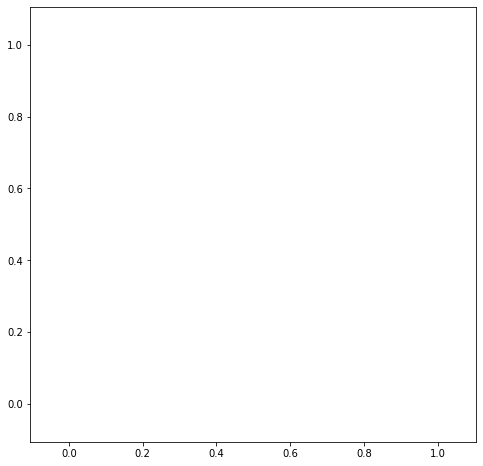

In [101]:
y_train_pca = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
plt.figure(figsize=(8, 8))
colors = ['navy', 'turquoise']
for color, i, target_name in zip(colors, [0, 1], y_train_pca):
    plt.scatter(X_train_pca[y_train_pca == i], X_train_pca[y_train_pca == i],
                color=color, lw=2, label=target_name)


# plt.legend(loc="best", shadow=False, scatterpoints=1)
# plt.axis([-4, 4, -1.5, 1.5])

plt.show()

In [ ]:
# line chart for pca
variances = [0.16482814061289802, 0.2223819145746536, 0.2763394346424325, 0.3124378899192246, 0.3476828045256034, 0.3724237914978008, 0.3924603433612459, 0.4118063778302636, 0.4289460976761441, 0.4438135520237007, 0.45686272502691594, 0.4689333146119426, 0.48067597048026167, 0.49142755020696366, 0.5019173880117609, 0.5117252158341634, 0.5203731593155279, 0.5287533253106801, 0.536483816913582, 0.5441293845014473, 0.5513279559937098, 0.5584517570543369, 0.5653682922271678, 0.5718891742491293, 0.578127596124597, 0.5841013434611143, 0.5898647034746283, 0.5954800458235158, 0.6007615903598091, 0.6058728049402342, 0.6108481055894086, 0.6157502956846381, 0.620495739344115, 0.6251816450660658, 0.6297958860125071, 0.6342969432937323, 0.6386697447771387, 0.6428558215571614, 0.6469795181867954, 0.6510199321411043, 0.6549824882340276, 0.658880477777978, 0.6626960719755278, 0.6664310328685509, 0.6701428570583742, 0.6737542825885983, 0.6772651594019043, 0.6807256817682505, 0.6841319250625844, 0.6874530878875923, 0.6907297186279356, 0.69394373058717, 0.697148016887181, 0.7002877882119739, 0.7034047198870067, 0.7064476842121273, 0.7094298890127336, 0.712392059176739, 0.7152811745931417, 0.7181568520184315, 0.7210064835951148, 0.7238048811599983, 0.7265681706713947, 0.7292775456304303, 0.7319661264483466, 0.7346181063301133, 0.7372390229848613, 0.7398181203898847, 0.7423728855108283, 0.7448886565566024, 0.7473803731593702, 0.7498073040062887, 0.7522176888451506, 0.7545975002624186, 0.7569607259089246, 0.7592813107633147, 0.7615944768159347, 0.7638732961663743, 0.7661230013792902, 0.768354510871967, 0.7705271473584246, 0.7726805466298771, 0.7747966924502158, 0.7768830974255433, 0.7789506880208489, 0.7810034141596687, 0.7830332830673471, 0.7850291400572543, 0.787000801727109, 0.7889482537267914, 0.7908607886334083, 0.7927534184314946, 0.7946365463823376, 0.7965054348749283, 0.7983463660250288, 0.8001577122572974, 0.8019542733666248, 0.8037231958302018, 0.8054868551526767, 0.8072438590678943]
n_compo = [i for i in range(1,101)]

fig = plt.figure(figsize=(12, 8))

plt.plot(n_compo, variances, color='#fcb43e')
plt.ylim(0,1)
plt.xlabel('n_components', fontsize=25)
plt.ylabel('total explained variance',fontsize=25)
plt.title('PCA curve',fontsize=25)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

fig.tight_layout()

plt.savefig('pca_curve.png')
plt.show()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])